In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy import units as u
import os
import pandas as pd
from astropy import constants as const

x=np.arange(5000,8000,0.001)
t_x = np.arange(5000,8000,1)

total_f_ratio = 5.15
ratio_6560 = 6560.47 / 1025.27

def R_Flux(F0,lam,lam_i,del_lam_i, ratio , flux_L , eff , Fc):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2/2)  
    return ((fl) / ratio**2) * (eff * flux_L) + Fc

def Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2)/np.sqrt(2*np.pi*del_lam_i**2) + Fc
    return fl

def Data_R_Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def total_flux(f,x ,fc):
    ft = 0
    dx = x[1]- x[0]
    for ii, flux in enumerate(f) :
        ft += (flux-fc)*dx #*x[ii] 
    return ft

def test_flux(f,x):
    flux = f*x *np.sqrt(2*np.pi)
    return flux

In [2]:
NGC6741_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
NGC6884_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6884/cngc6884_3600s.0055.txt"
NGC6886_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/ngc6886_2400s.0051.txt"
NGC6881_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
H4_1_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/H_4_1.txt"
Hen2_447_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/Hen_2_447.txt"
Hu2_1_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/Hu_2_1.txt"
J900_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/J_900.txt"
M1_8_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/M_1_8.txt"
NGC2346_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2346.txt"
NGC2392_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2392.txt"
NGC3242_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_3242.txt"

In [3]:
direct = r"/home/jin/cloudy_Test/parameters"



files = os.listdir(direct)

txt_files = [file for file in files if file.endswith('result.txt')]


parameters_names = []
for file in txt_files:

    parts = file.split('_')

    if len(parts) > 1 and parts[1] == 's':
        parameters_name = parts[0] + parts[1]
    else:
        parameters_name = parts[0]
    
    parameters_names.append(parameters_name)

print(parameters_names)

['Hen2-447', 'NGC6886s', 'NGC2346', 'NGC6886', 'NGC6881', 'M1-8', 'NGC2392', 'Hu2-1s', 'H4-1', 'Hu2-1', 'NGC2392s', 'NGC6884', 'NGC3242', 'J900', 'J900s', 'NGC6741', 'NGC3242s']


In [4]:
for ii , name in enumerate(parameters_names):
    direct_p = direct + '/' + txt_files[ii]
    name_w = name.replace('-', '_')
    
    globals()[f'paramter_{name_w}']= pd.read_csv(direct_p,sep='\,',header=0,engine='python')

    globals()[f'Model_lam_{name_w}'] = globals()[f'paramter_{name_w}']['Wavelength'].to_numpy()
    globals()[f'Model_flux_{name_w}'] = globals()[f'paramter_{name_w}']['Flux'].to_numpy()

    globals()[f'F_c_{name_w}'] = globals()[f'paramter_{name_w}']['Continuum_Model'].to_numpy()

    globals()[f'F_6527_{name_w}'] = globals()[f'paramter_{name_w}']['HeII_6527_Model'].to_numpy()
    globals()[f'F_6545_{name_w}'] = globals()[f'paramter_{name_w}']['Raman_HeII_6545_Model'].to_numpy()   

    globals()[f'F_6560_{name_w}'] = globals()[f'paramter_{name_w}']['He_6560_Model'].to_numpy()
    globals()[f'F_6563_{name_w}'] = globals()[f'paramter_{name_w}']['Ha_6563_Model'].to_numpy()
    globals()[f'F_6548_1_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6548_1_Model'].to_numpy()
    globals()[f'F_6548_2_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6548_2_Model'].to_numpy()

    globals()[f'F_6584_1_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6584_1_Model'].to_numpy()
    globals()[f'F_6584_2_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6584_2_Model'].to_numpy()

NGC 6741

Noise level = 6530-6540

([<matplotlib.axis.YTick at 0x7fc09ef430d0>,
 [Text(0, 1.0, '1.0$\\times 10^{-3}$'),
  Text(0, 2.0, '2.0$\\times 10^{-3}$'),
  Text(0, 3.0, '3.0$\\times 10^{-3}$')])

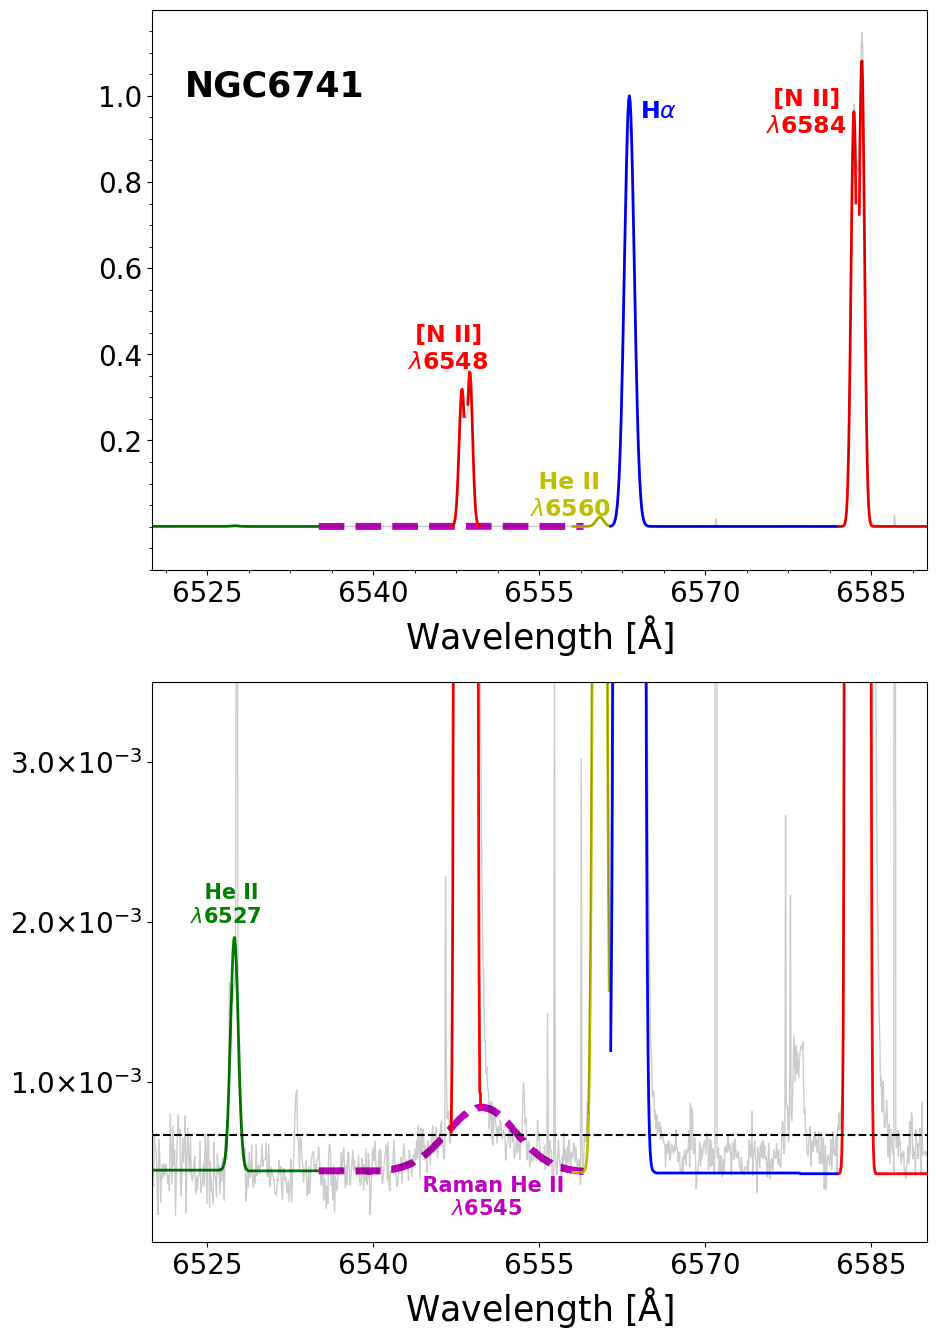

In [5]:
fig = plt.figure(1,figsize=(10,16))


plt.subplot(211)
name = 'NGC6741'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = globals()[f'F_6563_{name}'].max()

# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6527_{name}']/normal,'g',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6560_{name}']/normal,'y',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6563_{name}']/normal,'b',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6545_{name}']/normal,'m',lw=2)

x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g',lw=2)
x_6545 = np.where((globals()[f'Model_lam_{name}'] >= 6535)&(globals()[f'Model_lam_{name}'] <= 6559))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6545 ],globals()[f'F_6545_{name}'][x_6545 ]/normal,'m--',lw=5)
x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558)&(globals()[f'Model_lam_{name}'] <= 6561.35))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y',lw=2)
x_6563 = np.where((globals()[f'Model_lam_{name}'] >= 6561.445)&(globals()[f'Model_lam_{name}'] <= 6582))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6563 ],globals()[f'F_6563_{name}'][x_6563 ]/normal,'b',lw=2)

x_6548_1 = np.where((globals()[f'Model_lam_{name}'] >= 6547)&(globals()[f'Model_lam_{name}'] <= 6548.2))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_1 ],globals()[f'F_6548_1_{name}'][x_6548_1 ]/normal,'r',alpha=1,lw=2)

x_6548_2 = np.where((globals()[f'Model_lam_{name}'] >= 6548.5)&(globals()[f'Model_lam_{name}'] <= 6549.65))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_2 ],globals()[f'F_6548_2_{name}'][x_6548_2 ]/normal,'r',alpha=1,lw=2)

x_6584_1 = np.where((globals()[f'Model_lam_{name}'] >= 6582)&(globals()[f'Model_lam_{name}'] <= 6583.6))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_1 ],globals()[f'F_6584_1_{name}'][x_6584_1 ]/normal,'r',alpha=1,lw=2)



x_6584_2 = np.where((globals()[f'Model_lam_{name}'] >=6583.9))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_2 ],globals()[f'F_6584_2_{name}'][x_6584_2 ]/normal,'r',alpha=1,lw=2)


plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.2,lw=1)

x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.15),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')

x_p = np.argmax(globals()[f'F_6584_1_{name}'])
y_label = globals()[f'F_6584_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-8,y_label*(0.95),' [N II]\n$\lambda$6584',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
x_min,x_max = 6520,6590
plt.xlim(x_min,x_max)

plt.xticks(np.arange(6525,6590,15),fontsize=20)
plt.ylim(-0.1,1.2)
plt.yticks(fontsize=20)
plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,1,f'{name}',size=25,fontweight='bold')

plt.subplot(212)

factor = 1000
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']


x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g',lw=2)
x_6545 = np.where((globals()[f'Model_lam_{name}'] >= 6535)&(globals()[f'Model_lam_{name}'] <= 6559))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6545 ],globals()[f'F_6545_{name}'][x_6545 ]/normal,'m--',lw=5)
x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558)&(globals()[f'Model_lam_{name}'] <= 6561.35))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y',lw=2)
x_6563 = np.where((globals()[f'Model_lam_{name}'] >= 6561.445)&(globals()[f'Model_lam_{name}'] <= 6582))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6563 ],globals()[f'F_6563_{name}'][x_6563 ]/normal,'b',lw=2)

x_6548_1 = np.where((globals()[f'Model_lam_{name}'] >= 6547)&(globals()[f'Model_lam_{name}'] <= 6548.2))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_1 ],globals()[f'F_6548_1_{name}'][x_6548_1 ]/normal,'r',alpha=1,lw=2)

x_6548_2 = np.where((globals()[f'Model_lam_{name}'] >= 6548.5)&(globals()[f'Model_lam_{name}'] <= 6549.65))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_2 ],globals()[f'F_6548_2_{name}'][x_6548_2 ]/normal,'r',alpha=1,lw=2)

x_6584_1 = np.where((globals()[f'Model_lam_{name}'] >= 6582)&(globals()[f'Model_lam_{name}'] <= 6583.6))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_1 ],globals()[f'F_6584_1_{name}'][x_6584_1 ]/normal,'r',alpha=1,lw=2)



x_6584_2 = np.where((globals()[f'Model_lam_{name}'] >=6583.9))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_2 ],globals()[f'F_6584_2_{name}'][x_6584_2 ]/normal,'r',alpha=1,lw=2)
xx = np.arange(6549,6551,0.001)
yy = plt.vlines(x=globals()[f'Model_lam_{name}'][x_6548_2].max()-0.005, ymin= globals()[f'F_6545_{name}'][x_6545 ].max()/normal, ymax=globals()[f'F_6548_2_{name}'][x_6548_2 ].min()/normal,linestyle='-',color='r',lw=2)

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.2,lw=1)

plt.xlim(x_min,x_max)

x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')


x_p = np.argmax(globals()[f'F_6545_{name}'])
y_label = globals()[f'F_c_{name}'].mean() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-6.5,y_label*(0.4),'  Raman He II \n      $\lambda$6545',size=15,fontweight='bold',color='m')

lam_6530_6540 =globals()[f'Model_flux_{name}'][np.where((globals()[f'Model_lam_{name}'] >= 6530)&(globals()[f'Model_lam_{name}'] <= 6540) )[0]]
Noise_level = (globals()[f'F_c_{name}'].mean()+ 2*(lam_6530_6540).std())/normal
plt.axhline(y = Noise_level,xmin=0,xmax=1,linestyle='--',color='k')

plt.xticks(np.arange(6525,6590,15),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylim(1e-5,3.5)
ytick_positions = [1.0, 2.0,3.0]

# # Y 축 눈금 레이블 설정
ytick_labels = [r'1.0$\times 10^{-3}$', r'2.0$\times 10^{-3}$', r'3.0$\times 10^{-3}$']

# # Y 축 눈금과 레이블 적용
plt.yticks(ytick_positions, ytick_labels, fontsize=20)



# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/BOES_{name}f5',bbox_inches='tight')

NGC 6881

Noise level 구간 : 6570-6575

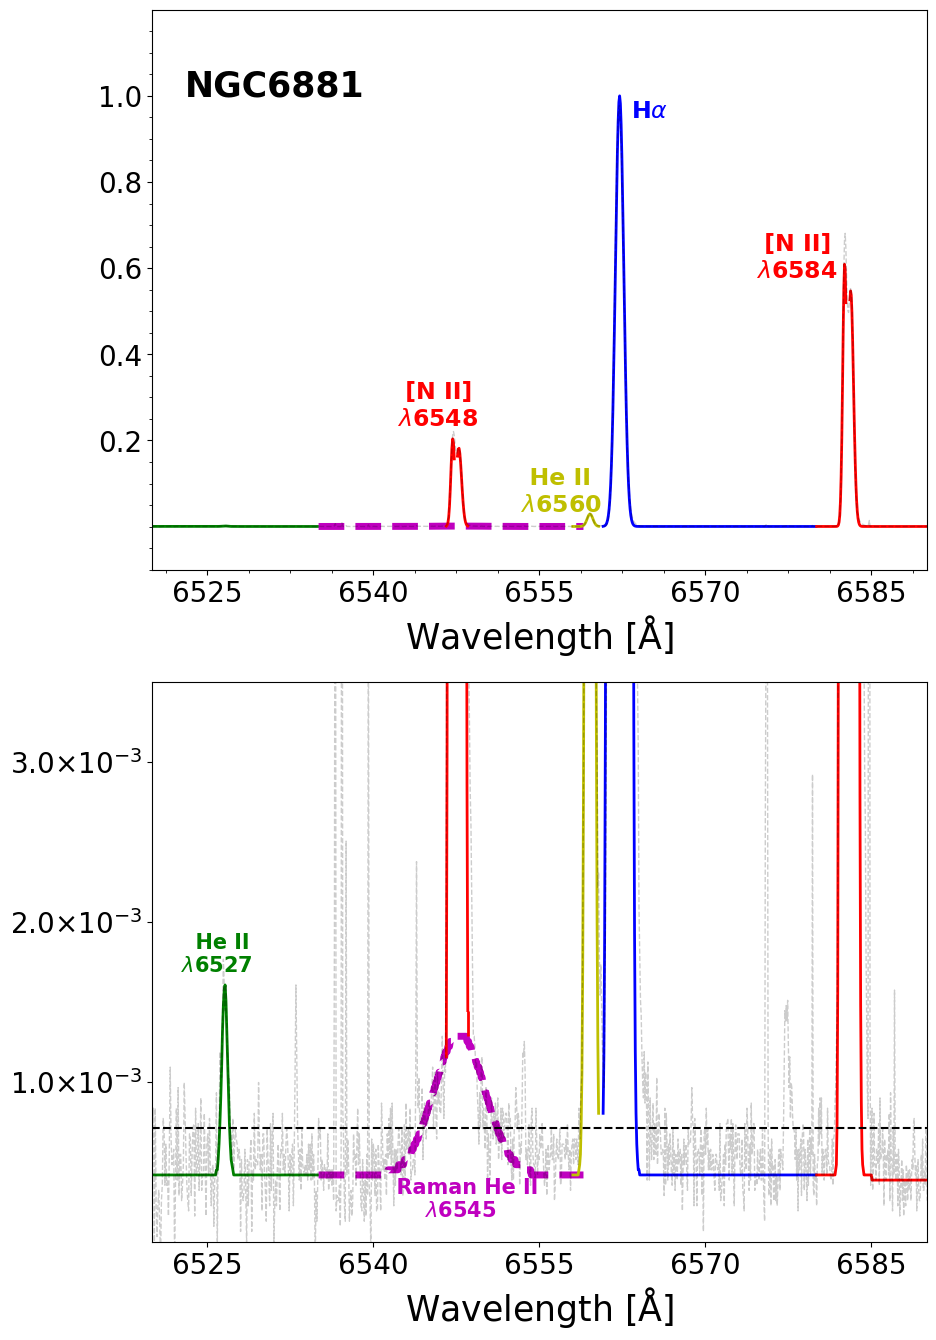

In [13]:
fig = plt.figure(1,figsize=(10,16))


plt.subplot(211)
name = 'NGC6881'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = globals()[f'F_6563_{name}'].max()

# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6527_{name}']/normal,'g',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6560_{name}']/normal,'y',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6563_{name}']/normal,'b',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6545_{name}']/normal,'m',lw=2)

x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g',lw=2)
x_6545 = np.where((globals()[f'Model_lam_{name}'] >= 6535)&(globals()[f'Model_lam_{name}'] <= 6559))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6545 ],globals()[f'F_6545_{name}'][x_6545 ]/normal,'m--',lw=5)
x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558)&(globals()[f'Model_lam_{name}'] <= 6560.4))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y',lw=2)
x_6563 = np.where((globals()[f'Model_lam_{name}'] >= 6560.75) & (globals()[f'Model_lam_{name}'] <= 6580) )[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6563 ],globals()[f'F_6563_{name}'][x_6563 ]/normal,'b',lw=2)

x_6548_1 = np.where((globals()[f'Model_lam_{name}'] >= 6546.55)&(globals()[f'Model_lam_{name}'] <= 6547.35))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_1 ],globals()[f'F_6548_1_{name}'][x_6548_1 ]/normal,'r',alpha=1,lw=2)

x_6548_2 = np.where((globals()[f'Model_lam_{name}'] >= 6547.6)&(globals()[f'Model_lam_{name}'] <= 6548.6))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_2 ],globals()[f'F_6548_2_{name}'][x_6548_2 ]/normal,'r',alpha=1,lw=2)


x_6584_1 = np.where((globals()[f'Model_lam_{name}'] >= 6580)&(globals()[f'Model_lam_{name}'] <= 6582.7))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_1 ],globals()[f'F_6584_1_{name}'][x_6584_1 ]/normal,'r',alpha=1,lw=2)



x_6584_2 = np.where((globals()[f'Model_lam_{name}'] >=6583))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_2 ],globals()[f'F_6584_2_{name}'][x_6584_2 ]/normal,'r',alpha=1,lw=2)

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.2,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.15),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')

x_p = np.argmax(globals()[f'F_6584_1_{name}'])
y_label = globals()[f'F_6584_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-8,y_label*(0.95),' [N II]\n$\lambda$6584',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
x_min,x_max = 6520,6590
plt.xlim(x_min,x_max)

plt.xticks(np.arange(6525,6590,15),fontsize=20)
plt.ylim(-0.1,1.2)
plt.yticks(fontsize=20)
plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,1,f'{name}',size=25,fontweight='bold')

plt.subplot(212)

factor = 1000
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g',lw=2)
x_6545 = np.where((globals()[f'Model_lam_{name}'] >= 6535)&(globals()[f'Model_lam_{name}'] <= 6559))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6545 ],globals()[f'F_6545_{name}'][x_6545 ]/normal,'m--',lw=5)
x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558)&(globals()[f'Model_lam_{name}'] <= 6560.4))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y',lw=2)
x_6563 = np.where((globals()[f'Model_lam_{name}'] >= 6560.75) & (globals()[f'Model_lam_{name}'] <= 6580) )[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6563 ],globals()[f'F_6563_{name}'][x_6563 ]/normal,'b',lw=2)

x_6548_1 = np.where((globals()[f'Model_lam_{name}'] >= 6546.55)&(globals()[f'Model_lam_{name}'] <= 6547.35))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_1 ],globals()[f'F_6548_1_{name}'][x_6548_1 ]/normal,'r',alpha=1,lw=2)

x_6548_2 = np.where((globals()[f'Model_lam_{name}'] >= 6547.6)&(globals()[f'Model_lam_{name}'] <= 6548.6))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_2 ],globals()[f'F_6548_2_{name}'][x_6548_2 ]/normal,'r',alpha=1,lw=2)


x_6584_1 = np.where((globals()[f'Model_lam_{name}'] >= 6580)&(globals()[f'Model_lam_{name}'] <= 6582.7))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_1 ],globals()[f'F_6584_1_{name}'][x_6584_1 ]/normal,'r',alpha=1,lw=2)



x_6584_2 = np.where((globals()[f'Model_lam_{name}'] >=6583))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_2 ],globals()[f'F_6584_2_{name}'][x_6584_2 ]/normal,'r',alpha=1,lw=2)


xx = np.arange(6549,6551,0.001)
yy = plt.vlines(x=globals()[f'Model_lam_{name}'][x_6548_2].max()-0.005, ymin= globals()[f'F_6545_{name}'][x_6545 ].max()/normal, ymax=globals()[f'F_6548_2_{name}'][x_6548_2 ].min()/normal,linestyle='-',color='r',lw=2)

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.2,lw=1)


x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')


x_p = np.argmax(globals()[f'F_6545_{name}'])
y_label = globals()[f'F_c_{name}'].mean() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-6.5,y_label*(0.4),'  Raman He II \n      $\lambda$6545',size=15,fontweight='bold',color='m')

lam_6530_6540 =globals()[f'Model_flux_{name}'][np.where((globals()[f'Model_lam_{name}'] >= 6570)&(globals()[f'Model_lam_{name}'] <= 6575) )[0]]
Noise_level = (globals()[f'F_c_{name}'].mean()+ 2*(lam_6530_6540).std())/normal
plt.axhline(y = Noise_level,xmin=0,xmax=1,linestyle='--',color='k')

plt.xticks(np.arange(6525,6590,15),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylim(1e-5,3.5)
plt.xlim(x_min,x_max)
ytick_positions = [1,2,3]

# # Y 축 눈금 레이블 설정
ytick_labels = [r'1.0$\times 10^{-3}$',r'2.0$\times 10^{-3}$', r'3.0$\times 10^{-3}$']

# # Y 축 눈금과 레이블 적용
plt.yticks(ytick_positions, ytick_labels, fontsize=20)



# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/BOES_{name}f5',bbox_inches='tight')

NGC6886

Noise level : 6530-6540

([<matplotlib.axis.YTick at 0x7fc09ed4b490>,
 [Text(0, 1, '1.0$\\times 10^{-3}$'),
  Text(0, 2, '2.0$\\times 10^{-3}$'),
  Text(0, 3, '3.0$\\times 10^{-3}$')])

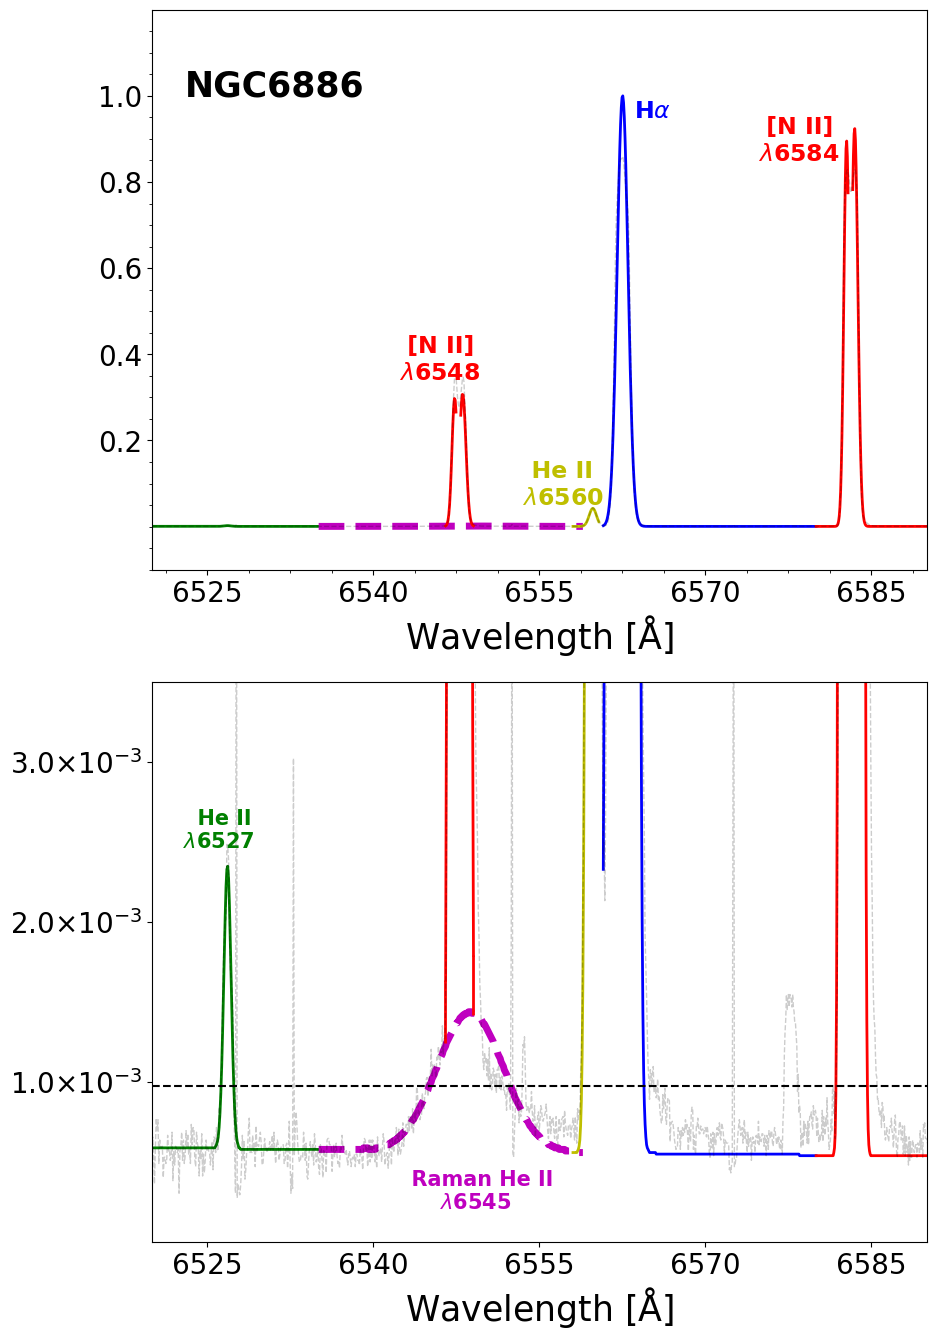

In [7]:
fig = plt.figure(1,figsize=(10,16))


plt.subplot(211)
name = 'NGC6886'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = globals()[f'F_6563_{name}'].max()

# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6527_{name}']/normal,'g',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6560_{name}']/normal,'y',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6563_{name}']/normal,'b',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6545_{name}']/normal,'m',lw=2)

x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g',lw=2)
x_6545 = np.where((globals()[f'Model_lam_{name}'] >= 6535)&(globals()[f'Model_lam_{name}'] <= 6559))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6545 ],globals()[f'F_6545_{name}'][x_6545 ]/normal,'m--',lw=5)
x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558)&(globals()[f'Model_lam_{name}'] <= 6560.4))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y',lw=2)
x_6563 = np.where((globals()[f'Model_lam_{name}'] >= 6560.75) & (globals()[f'Model_lam_{name}'] <= 6580) )[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6563 ],globals()[f'F_6563_{name}'][x_6563 ]/normal,'b',lw=2)

x_6548_1 = np.where((globals()[f'Model_lam_{name}'] >= 6546.5)&(globals()[f'Model_lam_{name}'] <= 6547.5))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_1 ],globals()[f'F_6548_1_{name}'][x_6548_1 ]/normal,'r',alpha=1,lw=2)

x_6548_2 = np.where((globals()[f'Model_lam_{name}'] >= 6547.9)&(globals()[f'Model_lam_{name}'] <= 6549.1))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_2 ],globals()[f'F_6548_2_{name}'][x_6548_2 ]/normal,'r',alpha=1,lw=2)



x_6584_1 = np.where((globals()[f'Model_lam_{name}'] >= 6580)&(globals()[f'Model_lam_{name}'] <=  6582.9))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_1 ],globals()[f'F_6584_1_{name}'][x_6584_1 ]/normal,'r',alpha=1,lw=2)



x_6584_2 = np.where((globals()[f'Model_lam_{name}'] >=6583.3))[0]

plt.plot(globals()[f'Model_lam_{name}'][x_6584_2 ],globals()[f'F_6584_2_{name}'][x_6584_2 ]/normal,'r',alpha=1,lw=2)

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.2,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.15),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')

x_p = np.argmax(globals()[f'F_6584_1_{name}'])
y_label = globals()[f'F_6584_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-8,y_label*(0.95),' [N II]\n$\lambda$6584',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
x_min,x_max = 6520,6590
plt.xlim(x_min,x_max)

plt.xticks(np.arange(6525,6590,15),fontsize=20)
plt.ylim(-0.1,1.2)
plt.yticks(fontsize=20)
plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,1,f'{name}',size=25,fontweight='bold')

plt.subplot(212)

factor = 1000
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g',lw=2)
x_6545 = np.where((globals()[f'Model_lam_{name}'] >= 6535)&(globals()[f'Model_lam_{name}'] <= 6559))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6545 ],globals()[f'F_6545_{name}'][x_6545 ]/normal,'m--',lw=5)
x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6558)&(globals()[f'Model_lam_{name}'] <= 6560.5))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y',lw=2)
x_6563 = np.where((globals()[f'Model_lam_{name}'] >= 6560.75) & (globals()[f'Model_lam_{name}'] <= 6580) )[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6563 ],globals()[f'F_6563_{name}'][x_6563 ]/normal,'b',lw=2)

x_6548_1 = np.where((globals()[f'Model_lam_{name}'] >= 6546.5)&(globals()[f'Model_lam_{name}'] <= 6547.35))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_1 ],globals()[f'F_6548_1_{name}'][x_6548_1 ]/normal,'r',alpha=1,lw=2)

x_6548_2 = np.where((globals()[f'Model_lam_{name}'] >= 6547.5)&(globals()[f'Model_lam_{name}'] <= 6549.1))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_2 ],globals()[f'F_6548_2_{name}'][x_6548_2 ]/normal,'r',alpha=1,lw=2)



x_6584_1 = np.where((globals()[f'Model_lam_{name}'] >= 6580)&(globals()[f'Model_lam_{name}'] <= 6582.9))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_1 ],globals()[f'F_6584_1_{name}'][x_6584_1 ]/normal,'r',alpha=1,lw=2)



x_6584_2 = np.where((globals()[f'Model_lam_{name}'] >=6583))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_2 ],globals()[f'F_6584_2_{name}'][x_6584_2 ]/normal,'r',alpha=1,lw=2)


xx = np.arange(6549,6551,0.001)
yy = plt.vlines(x=globals()[f'Model_lam_{name}'][x_6548_1].min()-0.05, ymin= (globals()[f'F_6545_{name}'][x_6545 ].max()-2)/normal, ymax=globals()[f'F_6548_1_{name}'][x_6548_1 ].min()/normal,linestyle='-',color='r',lw=2)
yy = plt.vlines(x=globals()[f'Model_lam_{name}'][x_6548_2].max(), ymin= (globals()[f'F_6545_{name}'][x_6545 ].max()-0.2)/normal, ymax=globals()[f'F_6548_2_{name}'][x_6548_2 ].min()/normal,linestyle='-',color='r',lw=2)

lam_6530_6540 =globals()[f'Model_flux_{name}'][np.where((globals()[f'Model_lam_{name}'] >= 6530)&(globals()[f'Model_lam_{name}'] <= 6540) )[0]]
Noise_level = (globals()[f'F_c_{name}'].mean()+ 2*(lam_6530_6540).std())/normal
plt.axhline(y = Noise_level,xmin=0,xmax=1,linestyle='--',color='k')

plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.2,lw=1)

plt.xlim(x_min,x_max)

x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')


x_p = np.argmax(globals()[f'F_6545_{name}'])
y_label = globals()[f'F_c_{name}'].mean() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-6.5,y_label*(0.4),'  Raman He II \n      $\lambda$6545',size=15,fontweight='bold',color='m')


plt.xticks(np.arange(6525,6590,15),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylim(1e-5,3.5)
ytick_positions = [1,2,3]

# # Y 축 눈금 레이블 설정
ytick_labels = [r'1.0$\times 10^{-3}$', r'2.0$\times 10^{-3}$',r'3.0$\times 10^{-3}$']

# # Y 축 눈금과 레이블 적용
plt.yticks(ytick_positions, ytick_labels, fontsize=20)



# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/BOES_{name}f5',bbox_inches='tight')

NGC 6884

Noise level : 6570-6575

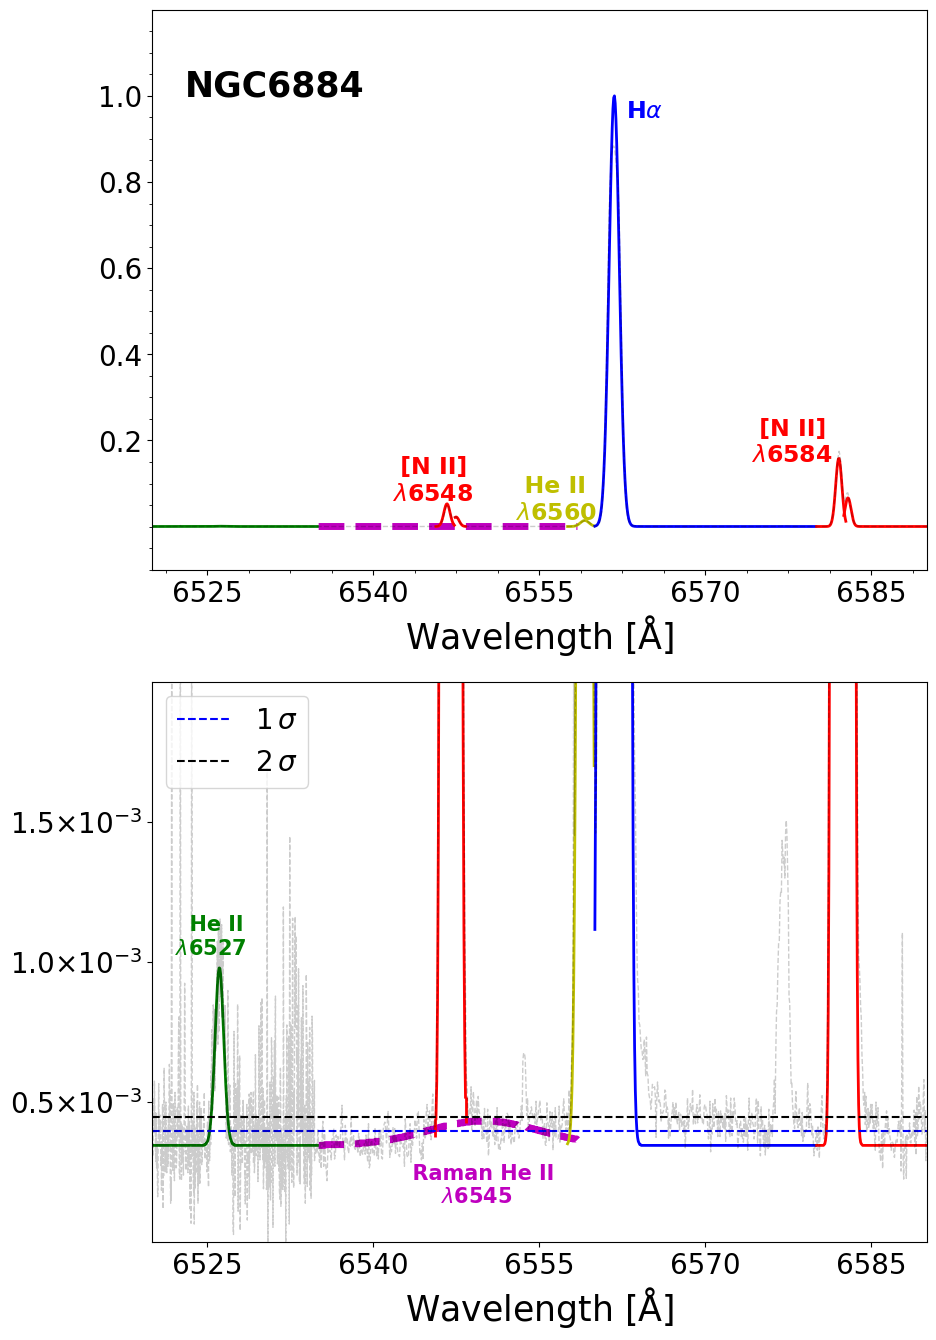

In [21]:
fig = plt.figure(1,figsize=(10,16))


plt.subplot(211)
name = 'NGC6884'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = globals()[f'F_6563_{name}'].max()

# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6527_{name}']/normal,'g',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6560_{name}']/normal,'y',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6563_{name}']/normal,'b',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6545_{name}']/normal,'m',lw=2)

x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g',lw=2)
x_6545 = np.where((globals()[f'Model_lam_{name}'] >= 6535)&(globals()[f'Model_lam_{name}'] <= 6558.5))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6545 ],globals()[f'F_6545_{name}'][x_6545 ]/normal,'m--',lw=5)
x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6557.5)&(globals()[f'Model_lam_{name}'] <= 6560))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y',lw=2)
x_6563 = np.where((globals()[f'Model_lam_{name}'] >= 6560.) & (globals()[f'Model_lam_{name}'] <= 6580))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6563 ],globals()[f'F_6563_{name}'][x_6563 ]/normal,'b',lw=2)


x_6548_1 = np.where((globals()[f'Model_lam_{name}'] >= 6545.6)&(globals()[f'Model_lam_{name}'] <= 6547.35))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_1 ],globals()[f'F_6548_1_{name}'][x_6548_1 ] /normal,'r',alpha=1,lw=2)

x_6548_2 = np.where((globals()[f'Model_lam_{name}'] >=  6547.35)&(globals()[f'Model_lam_{name}'] <= 6548.4))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_2 ],globals()[f'F_6548_2_{name}'][x_6548_2 ]/normal,'r',alpha=1,lw=2)


x_6584_1 = np.where((globals()[f'Model_lam_{name}'] >= 6580)&(globals()[f'Model_lam_{name}'] <= 6582.7))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_1 ],globals()[f'F_6584_1_{name}'][x_6584_1 ]/normal,'r',alpha=1,lw=2)



x_6584_2 = np.where((globals()[f'Model_lam_{name}'] >=6582.5))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_2 ],globals()[f'F_6584_2_{name}'][x_6584_2 ]/normal,'r',alpha=1,lw=2)


plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.2,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.15),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')

x_p = np.argmax(globals()[f'F_6584_1_{name}'])
y_label = globals()[f'F_6584_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-8,y_label*(0.95),' [N II]\n$\lambda$6584',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
x_min,x_max = 6520,6590
plt.xlim(x_min,x_max)

plt.xticks(np.arange(6525,6590,15),fontsize=20)
plt.ylim(-0.1,(1.2))
plt.yticks(fontsize=20)
plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,1,f'{name}',size=25,fontweight='bold')

plt.subplot(212)

factor = 1000
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g',lw=2)
x_6545 = np.where((globals()[f'Model_lam_{name}'] >= 6535)&(globals()[f'Model_lam_{name}'] <= 6558.5))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6545 ],globals()[f'F_6545_{name}'][x_6545 ]/normal,'m--',lw=5)
x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6557.5)&(globals()[f'Model_lam_{name}'] <= 6560))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y',lw=2)
x_6563 = np.where((globals()[f'Model_lam_{name}'] >= 6560) & (globals()[f'Model_lam_{name}'] <= 6580))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6563 ],globals()[f'F_6563_{name}'][x_6563 ]/normal,'b',lw=2)


x_6548_1 = np.where((globals()[f'Model_lam_{name}'] >= 6545.6)&(globals()[f'Model_lam_{name}'] <= 6547.35))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_1 ],globals()[f'F_6548_1_{name}'][x_6548_1 ] /normal,'r',alpha=1,lw=2)

x_6548_2 = np.where((globals()[f'Model_lam_{name}'] >=  6547.35)&(globals()[f'Model_lam_{name}'] <= 6548.4))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_2 ],globals()[f'F_6548_2_{name}'][x_6548_2 ]/normal,'r',alpha=1,lw=2)


x_6584_1 = np.where((globals()[f'Model_lam_{name}'] >= 6580)&(globals()[f'Model_lam_{name}'] <= 6582.7))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_1 ],globals()[f'F_6584_1_{name}'][x_6584_1 ]/normal,'r',alpha=1,lw=2)



x_6584_2 = np.where((globals()[f'Model_lam_{name}'] >=6583))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_2 ],globals()[f'F_6584_2_{name}'][x_6584_2 ]/normal,'r',alpha=1,lw=2)


xx = np.arange(6549,6551,0.001)
yy = plt.vlines(x=globals()[f'Model_lam_{name}'][x_6548_1].min()-0.05, ymin= (globals()[f'F_6545_{name}'][x_6545 ].max()-2)/normal, ymax=globals()[f'F_6548_1_{name}'][x_6548_1 ].min()/normal,linestyle='-',color='r',lw=2)
yy = plt.vlines(x=globals()[f'Model_lam_{name}'][x_6548_2].max(), ymin= (globals()[f'F_6545_{name}'][x_6545 ].max()-0.2)/normal, ymax=globals()[f'F_6548_2_{name}'][x_6548_2 ].min()/normal,linestyle='-',color='r',lw=2)

lam_6530_6540 =globals()[f'Model_flux_{name}'][np.where((globals()[f'Model_lam_{name}'] >= 6570)&(globals()[f'Model_lam_{name}'] <= 6575) )[0]]
Noise_level = (globals()[f'F_c_{name}'].mean()+ 1*(lam_6530_6540).std())/normal
plt.axhline(y = Noise_level,xmin=0,xmax=1,linestyle='--',color='b',label=r'$1 \, \sigma$')

Noise_level = (globals()[f'F_c_{name}'].mean()+ 2*(lam_6530_6540).std())/normal
plt.axhline(y = Noise_level,xmin=0,xmax=1,linestyle='--',color='k',label=r'$2 \, \sigma$')


plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.2,lw=1)

plt.xlim(x_min,x_max)

x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')


x_p = np.argmax(globals()[f'F_6545_{name}'])
y_label = globals()[f'F_c_{name}'].mean() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-6.5,y_label*(0.4),'  Raman He II \n      $\lambda$6545',size=15,fontweight='bold',color='m')


plt.xticks(np.arange(6525,6590,15),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylim(1e-5,2.0)
ytick_positions = [0.5,1,1.5]

# # Y 축 눈금 레이블 설정
ytick_labels = [r'0.5$\times 10^{-3}$', r'1.0$\times 10^{-3}$', r'1.5$\times 10^{-3}$']

# # Y 축 눈금과 레이블 적용
plt.yticks(ytick_positions, ytick_labels, fontsize=20)


plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/BOES_{name}f5',bbox_inches='tight')

J900

([<matplotlib.axis.YTick at 0x7fc09569df50>,
 [Text(0, 0.5, '0.5$\\times 10^{-3}$'),
  Text(0, 1.0, '1.0$\\times 10^{-3}$'),
  Text(0, 1.5, '1.5$\\times 10^{-3}$')])

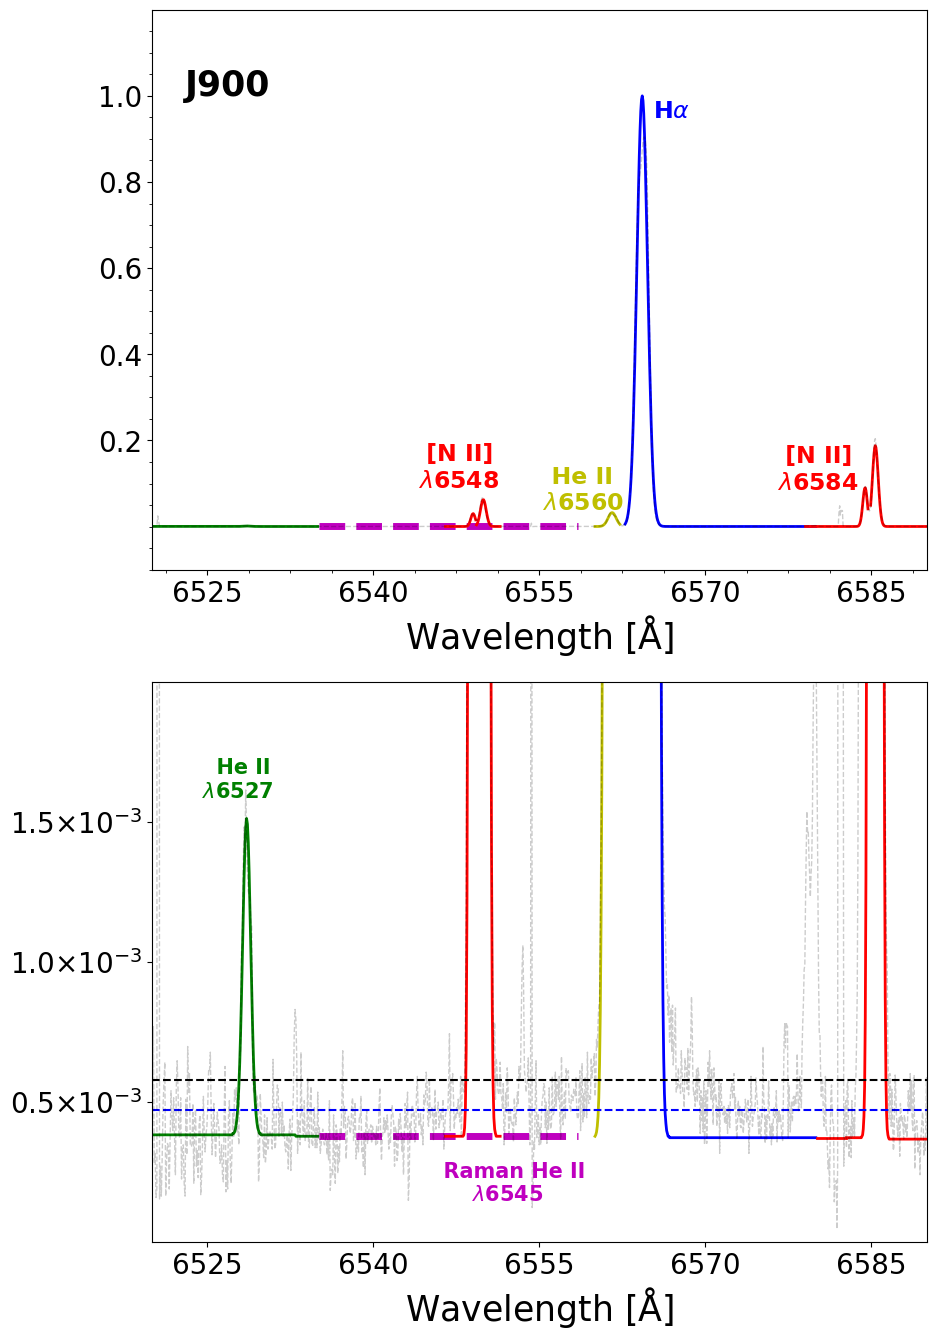

In [35]:
fig = plt.figure(1,figsize=(10,16))


plt.subplot(211)
name = 'J900'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = globals()[f'F_6563_{name}'].max()

# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6527_{name}']/normal,'g',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6560_{name}']/normal,'y',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6563_{name}']/normal,'b',lw=2)
# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6545_{name}']/normal,'m',lw=2)

x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g',lw=2)
x_6545 = np.where((globals()[f'Model_lam_{name}'] >= 6535)&(globals()[f'Model_lam_{name}'] <= 6558.5))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6545 ],globals()[f'F_6545_{name}'][x_6545 ]/normal,'m--',lw=5)
x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y',lw=2)


x_6563 = np.where((globals()[f'Model_lam_{name}'] >= 6562.7) & (globals()[f'Model_lam_{name}'] <= 6580))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6563 ],globals()[f'F_6563_{name}'][x_6563 ]/normal,'b',lw=2)


x_6548_1 = np.where((globals()[f'Model_lam_{name}'] >= 6546.5)&(globals()[f'Model_lam_{name}'] <= 6549.3))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_1 ],globals()[f'F_6548_1_{name}'][x_6548_1 ]/normal,'r',alpha=1,lw=2)

x_6548_2 = np.where((globals()[f'Model_lam_{name}'] >= 6549.3)&(globals()[f'Model_lam_{name}'] <= 6551.5))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_2 ],globals()[f'F_6548_2_{name}'][x_6548_2 ]/normal,'r',alpha=1,lw=2)


x_6584_1 = np.where((globals()[f'Model_lam_{name}'] >= 6579)&(globals()[f'Model_lam_{name}'] <= 6584.7))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_1 ],globals()[f'F_6584_1_{name}'][x_6584_1 ]/normal,'r',alpha=1,lw=2)



x_6584_2 = np.where((globals()[f'Model_lam_{name}'] >=6584.9))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_2 ],globals()[f'F_6584_2_{name}'][x_6584_2 ]/normal,'r',alpha=1,lw=2)




plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.2,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(3),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')

x_p = np.argmax(globals()[f'F_6584_1_{name}'])
y_label = globals()[f'F_6584_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-8,y_label*(0.95),' [N II]\n$\lambda$6584',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
x_min,x_max = 6520,6590
plt.xlim(x_min,x_max)

plt.xticks(np.arange(6525,6590,15),fontsize=20)
plt.ylim(-0.1,(1.2))
plt.yticks(fontsize=20)
plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,1,f'{name}',size=25,fontweight='bold')

plt.subplot(212)

factor = 1000
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g',lw=2)
x_6545 = np.where((globals()[f'Model_lam_{name}'] >= 6535)&(globals()[f'Model_lam_{name}'] <= 6558.5))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6545 ],globals()[f'F_6545_{name}'][x_6545 ]/normal,'m--',lw=5)
x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y',lw=2)


x_6563 = np.where((globals()[f'Model_lam_{name}'] >= 6565) & (globals()[f'Model_lam_{name}'] <= 6580))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6563 ],globals()[f'F_6563_{name}'][x_6563 ]/normal,'b',lw=2)


x_6548_1 = np.where((globals()[f'Model_lam_{name}'] >= 6546.5)&(globals()[f'Model_lam_{name}'] <= 6549.3))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_1 ],globals()[f'F_6548_1_{name}'][x_6548_1 ]/normal,'r',alpha=1,lw=2)

x_6548_2 = np.where((globals()[f'Model_lam_{name}'] >= 6549.3)&(globals()[f'Model_lam_{name}'] <= 6551.5))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6548_2 ],globals()[f'F_6548_2_{name}'][x_6548_2 ]/normal,'r',alpha=1,lw=2)


x_6584_1 = np.where((globals()[f'Model_lam_{name}'] >= 6580)&(globals()[f'Model_lam_{name}'] <= 6582.7))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_1 ],globals()[f'F_6584_1_{name}'][x_6584_1 ]/normal,'r',alpha=1,lw=2)



x_6584_2 = np.where((globals()[f'Model_lam_{name}'] >=6582.7))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6584_2 ],globals()[f'F_6584_2_{name}'][x_6584_2 ]/normal,'r',alpha=1,lw=2)


lam_6530_6540 =globals()[f'Model_flux_{name}'][np.where((globals()[f'Model_lam_{name}'] >= 6530)&(globals()[f'Model_lam_{name}'] <= 6540) )[0]]
Noise_level = (globals()[f'F_c_{name}'].mean()+ 1*(lam_6530_6540).std())/normal
plt.axhline(y = Noise_level,xmin=0,xmax=1,linestyle='--',color='b',label=r'$1 \, \sigma$')

Noise_level = (globals()[f'F_c_{name}'].mean()+ 2*(lam_6530_6540).std())/normal
plt.axhline(y = Noise_level,xmin=0,xmax=1,linestyle='--',color='k',label=r'$2 \, \sigma$')


plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.2,lw=1)

plt.xlim(x_min,x_max)

x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')


x_p = np.argmax(globals()[f'F_6545_{name}'])
y_label = globals()[f'F_c_{name}'].mean() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(6545,y_label*(0.4),'  Raman He II \n      $\lambda$6545',size=15,fontweight='bold',color='m')


plt.xticks(np.arange(6525,6590,15),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylim(1e-5,2.0)
ytick_positions = [0.5,1,1.5]

# # Y 축 눈금 레이블 설정
ytick_labels = [r'0.5$\times 10^{-3}$', r'1.0$\times 10^{-3}$', r'1.5$\times 10^{-3}$']

# # Y 축 눈금과 레이블 적용
plt.yticks(ytick_positions, ytick_labels, fontsize=20)


# plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/BOES_{name}f5',bbox_inches='tight')